# CAPTAIN tutorial – biodiversity simulations


After CAPTAIN and its dependencies are installed it can be imported in a Python console using:


In [ ]:
import os
os.chdir("../../captain-project-main")

In [2]:
import captain as cn

Gym has been unmaintained since 2022 and does not support NumPy 2.0 amongst other critical functionality.
Please upgrade to Gymnasium, the maintained drop-in replacement of Gym, or contact the authors of your software and request that they upgrade.
Users of this version of Gym should be able to simply replace 'import gym' with 'import gymnasium as gym' in the vast majority of cases.
See the migration guide at https://gymnasium.farama.org/introduction/migration_guide/ for additional information.


## Simulating a natural system
Simulated natural systems are spatial explicit environments containing a number of cells (the smallest spatial units) and a number of species with individuals distributed across the cells. 
These systems can be used to train model (i.e. optimize the parameters of a conservation policy) and to explore the effects of different policies and different patters of anthropogenic disturbance and climate change on biodiversity and other metrics. To this purpose, natural systems are simulated and stored in pickle files that can be loaded by CAPTAIN for use in a reinforcement learning framework.

Pre-simulated datasets are available for [download here](https://zenodo.org/api/files/c4663248-5dc2-4932-9d43-ec0c490595ae/data_dependencies.zip?versionId=d29260c1-7449-4075-aa83-6e32e5f0db7e).
Alternatively, a new simulated system can be generated using:

In [3]:
sim_file = cn.init_simulated_system(n_species=25,
                                    grid_size=100,
                                    cell_capacity=25,
                                    out_dir='./sim_data')

calculating  distances...
done.
init cells...
done.
25/25 init species 3 (20868 ind.) 🦒
System saved in:  ./sim_data/pickles/init_cell_4582_c100_s25_d0.3_t0.25.pkl


This will initialize a system of 100 x 100 cells (simulated systems are assumed to be of squared shape) with 50 species and 25 individuals per cell.  While the total number of individuals is fixed and equal to 100 x 100 x 25 (250,000), the number of individuals per species will follow a truncated Weibull distribution. The simulated system is stored in a file (`sim_file`) in the directory specified via the argument `out_dir` (a folder named `pickles` is created automatically to include the simulated datasets).

The simulated system can now be embedded in an environment that allows us to simulate the evolution of species ranges and population sizes based on a natural process of birth-death and dispersal and on changes in anthropogenic pressure (disturbance) and climate.
This is done using:

In [4]:
env = cn.simulate_biodiv_env(sim_file,
                             dispersal_rate=0.3,
                             climate_mode=3,
                             disturbance_mode=8)

runnerInput.runMode 0
Simulating 25 species tree...
re-loading grid...
Rnd sens [0.947 0.214 0.511 0.849 0.071]
Rnd climate sens [0.416 0.459 0.414 0.607 0.244]
Simulating 25 species tree...
Rnd sp values:  [0.03  6.337 0.096 0.034 0.014]


Dispersal rates can be provided as a single value, identical for all species, or as an array of values (for species-specific rates). Different models of climate change and changes in disturbance can be selected using the arguments `climate_mode` and `disturbance_mode`.

### Plotting the current state of the environment
The environment can be plotted to visualize a number of properties of the system, including:
1. a map of species richness
2. a map of population density
3. the species phylogeny
4. a rank-abundance plot
5. maps of climate and disturbance spatial patterns
6. species ranges

The plots are generated using the function below and are saved in the specified working directory (argument `wd`) as a single PDF file.

Plot saved as: ./sim_step_0.pdf


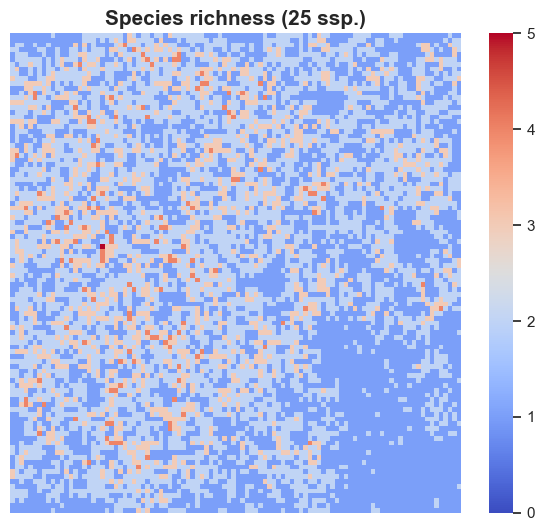

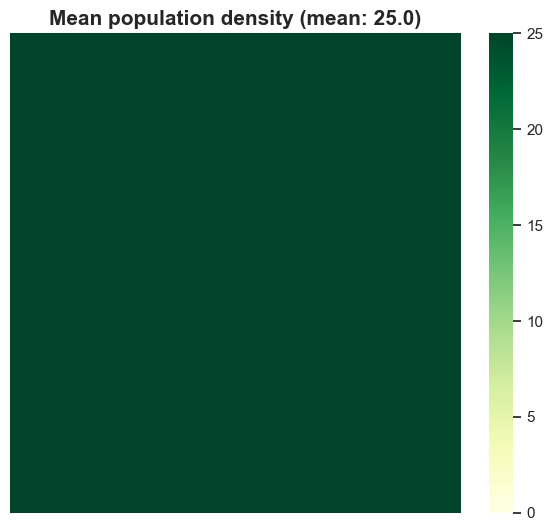

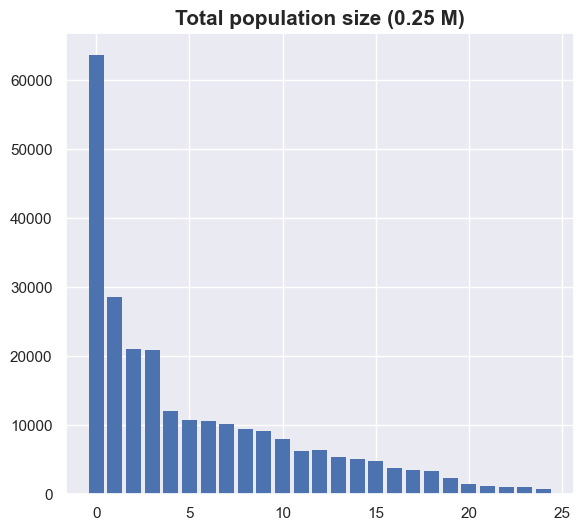

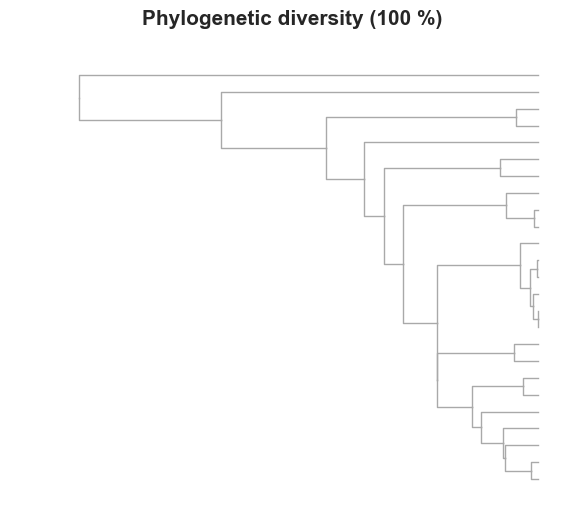

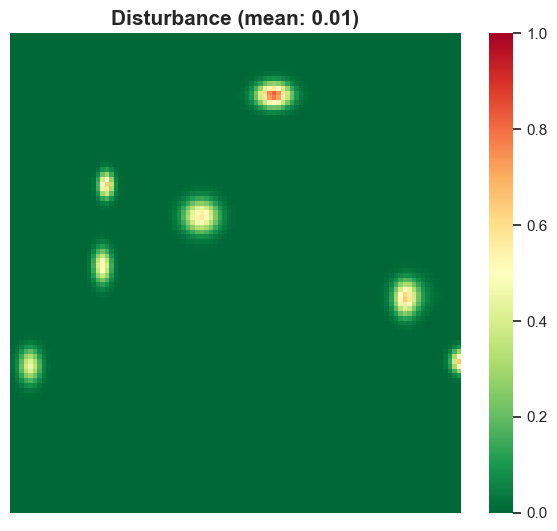

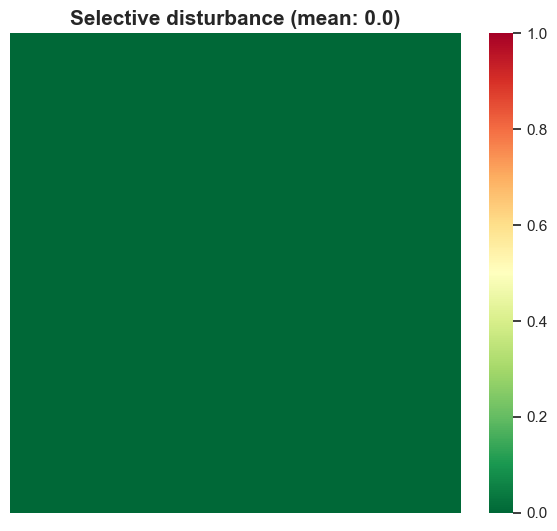

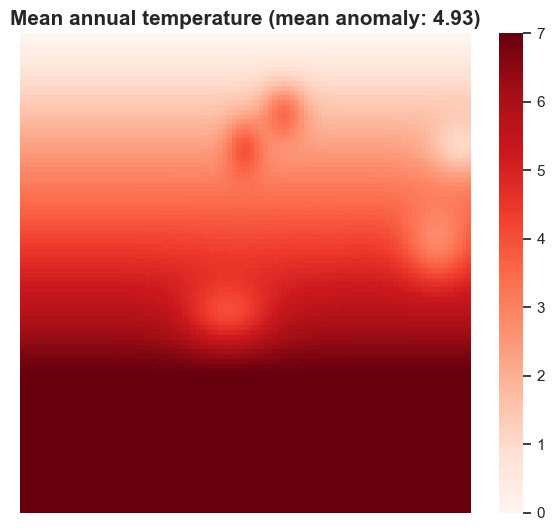

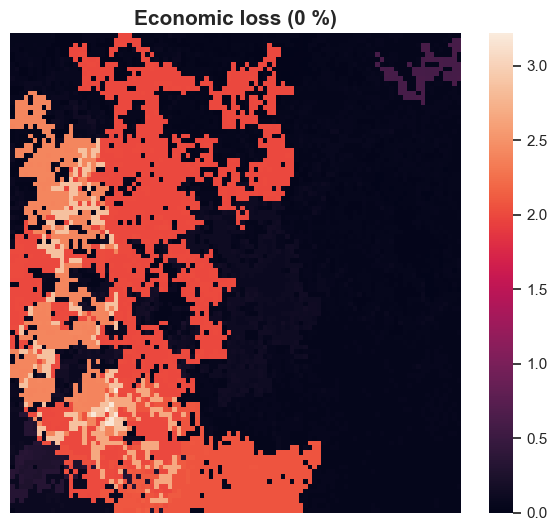

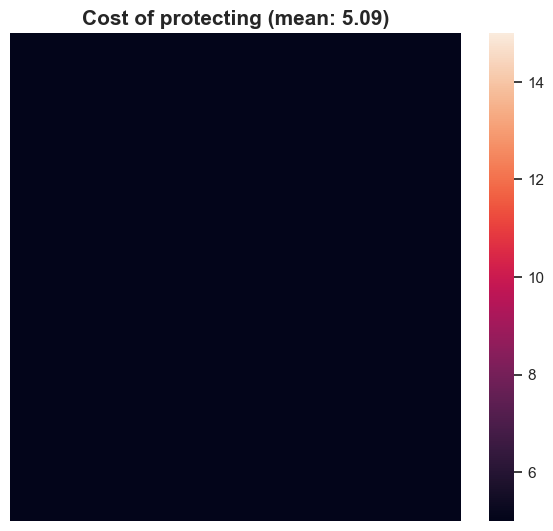

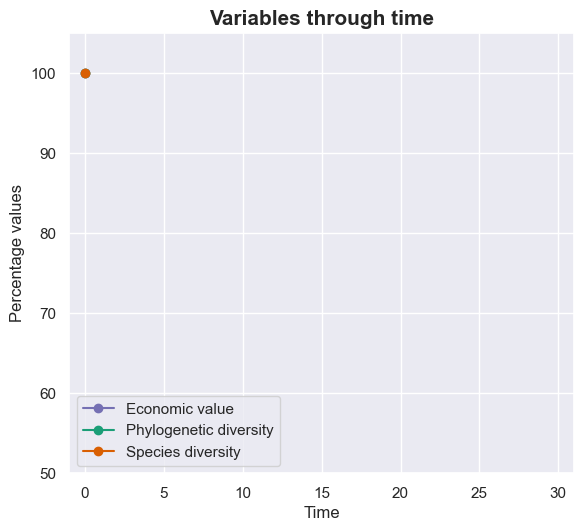

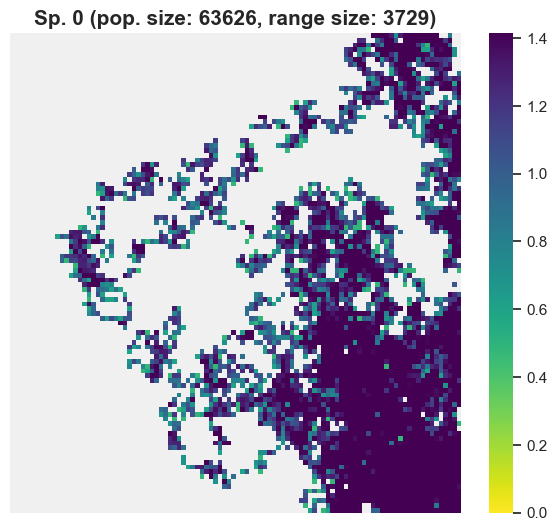

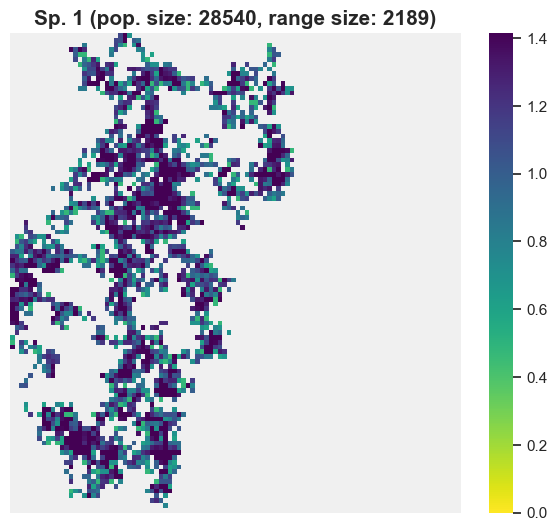

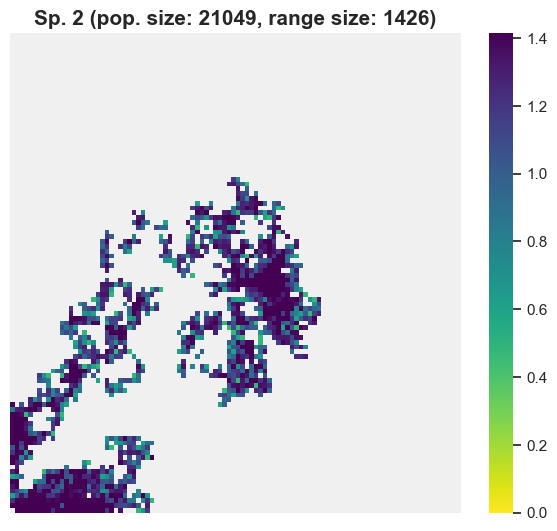

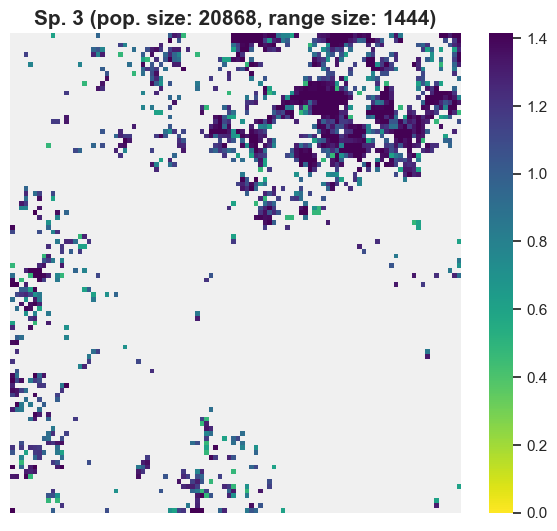

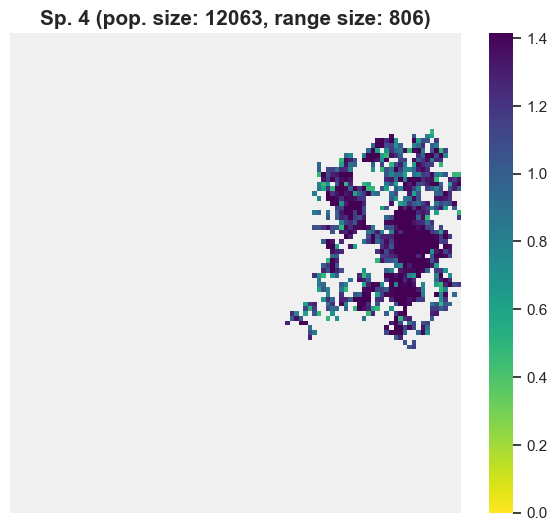

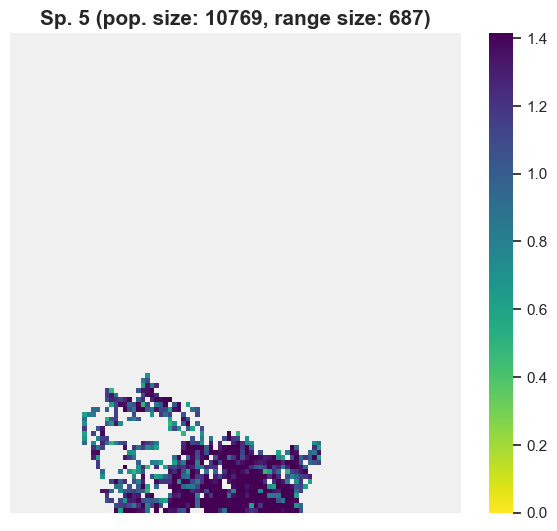

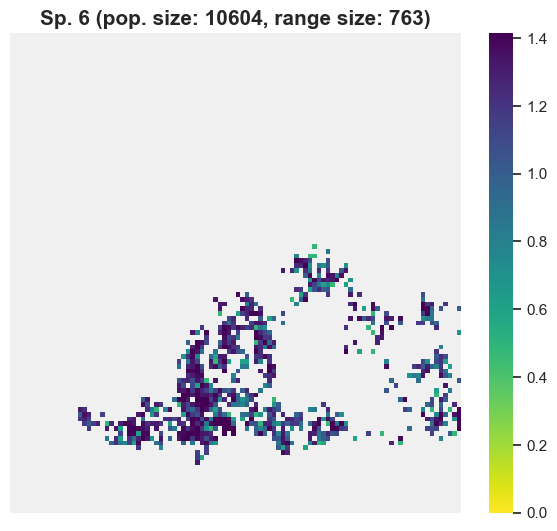

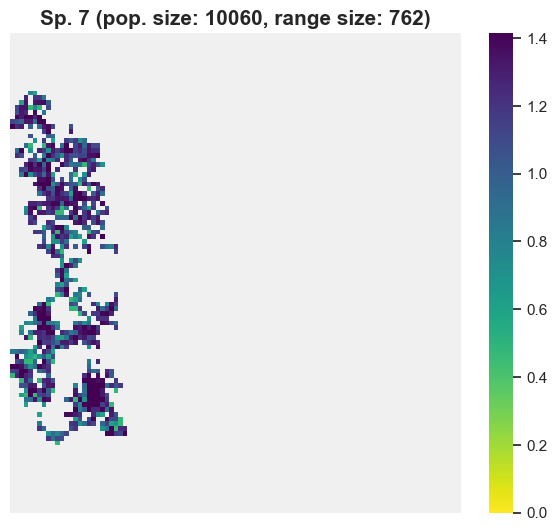

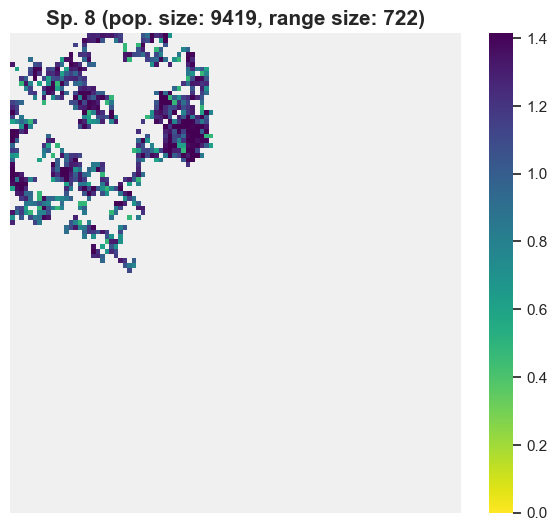

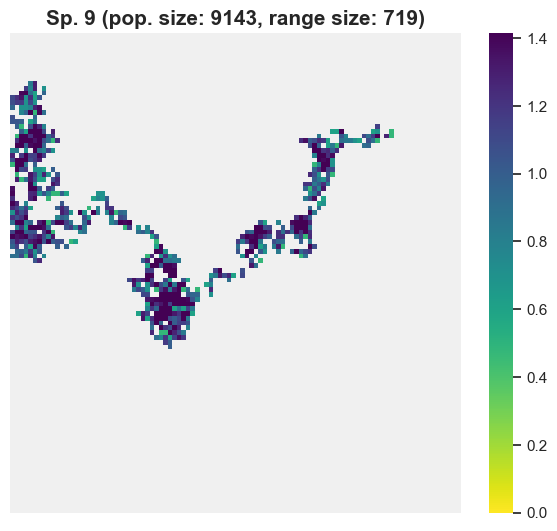

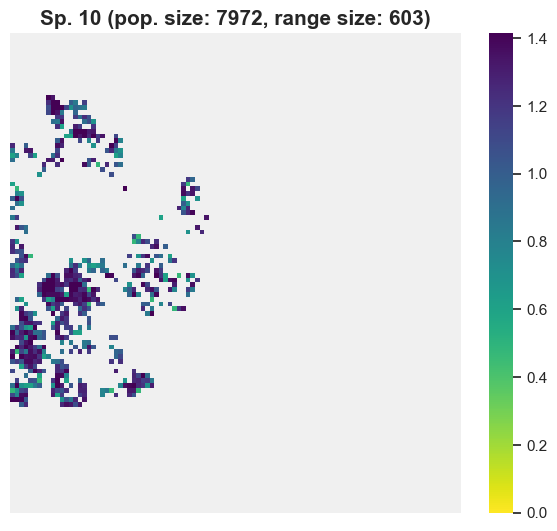

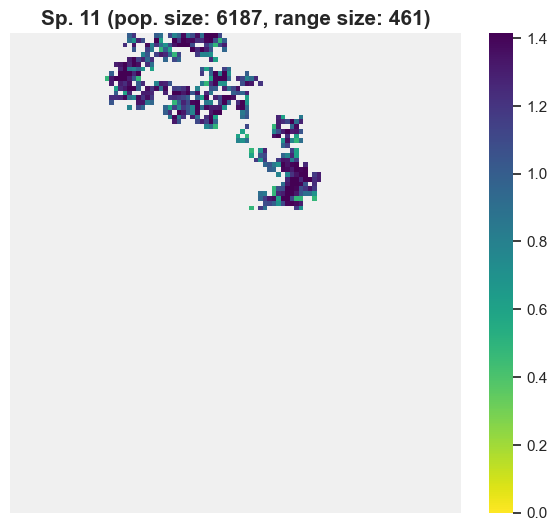

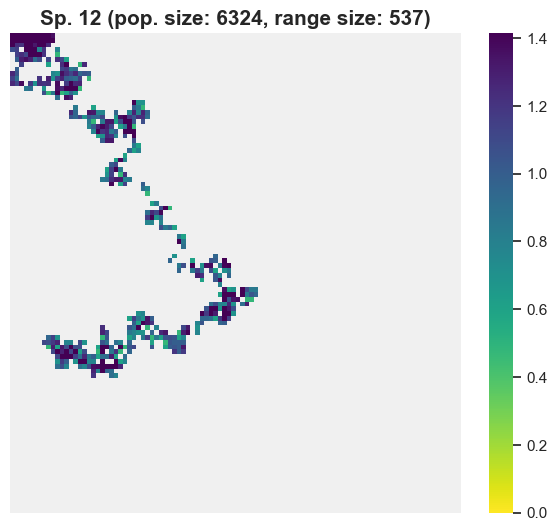

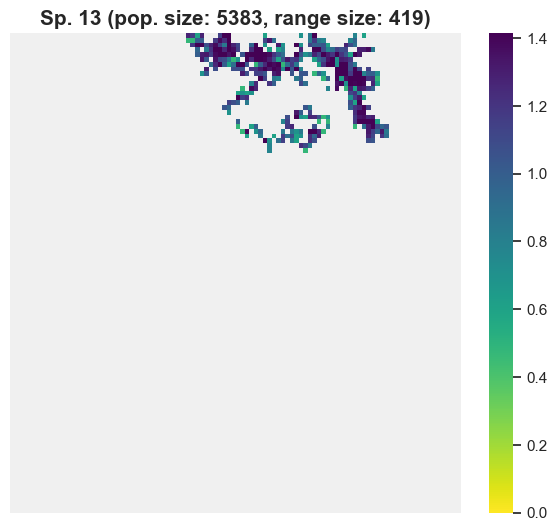

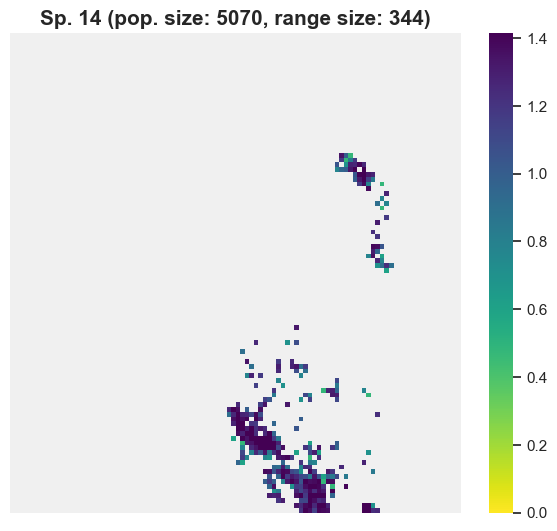

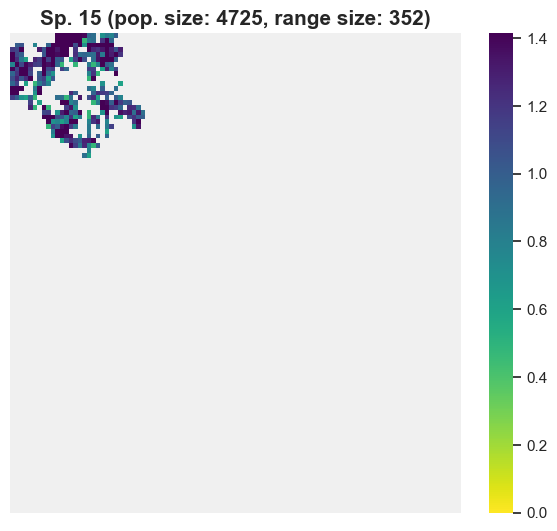

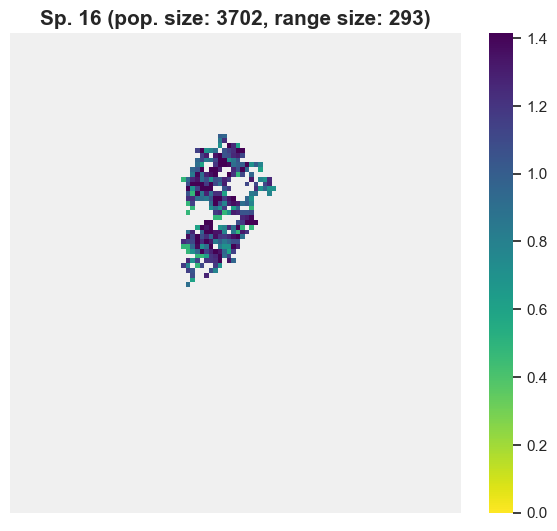

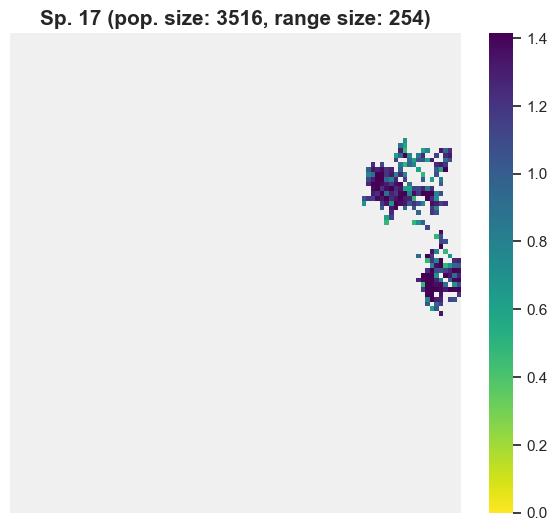

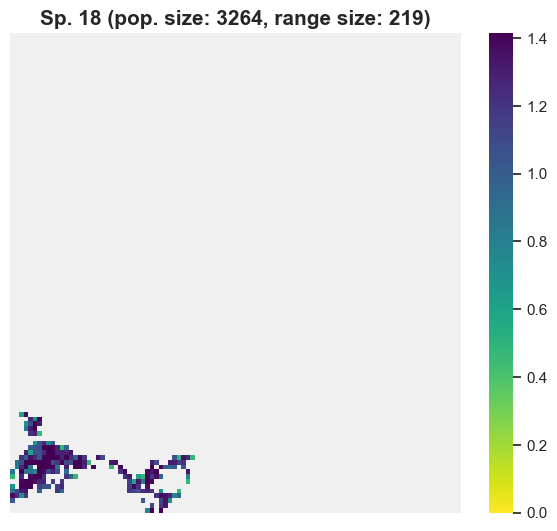

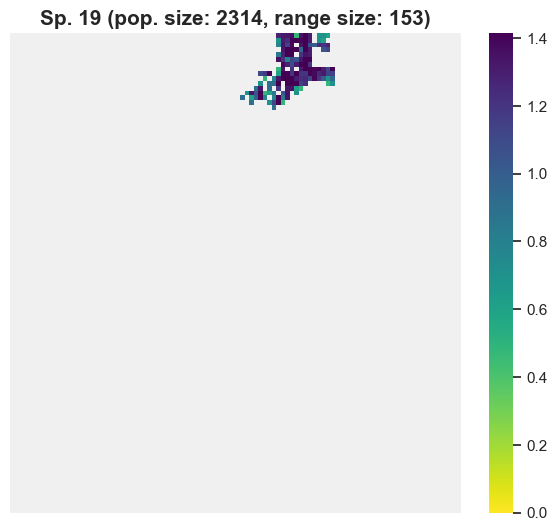

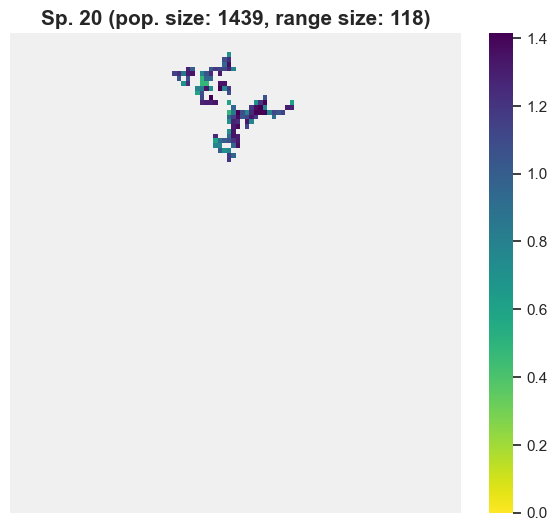

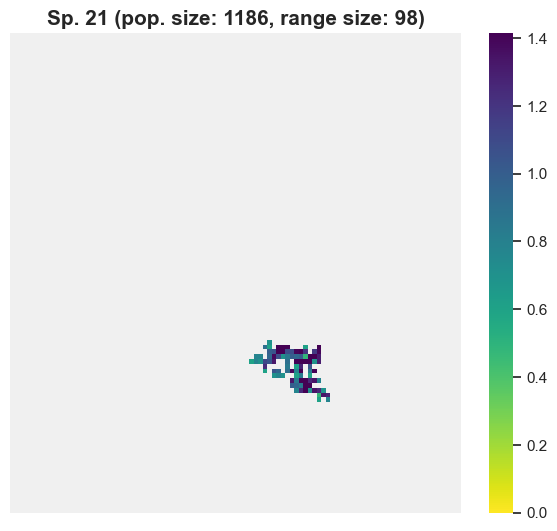

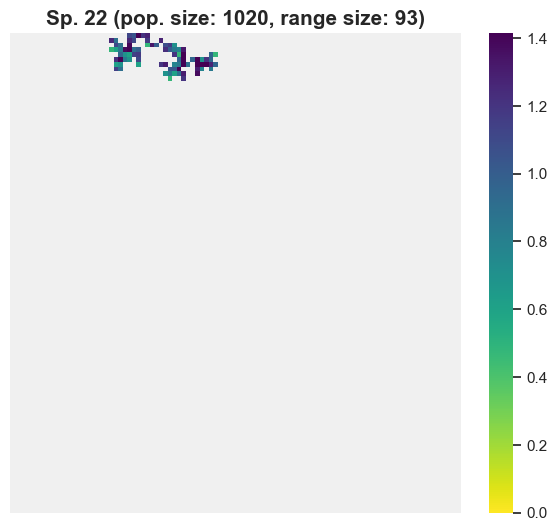

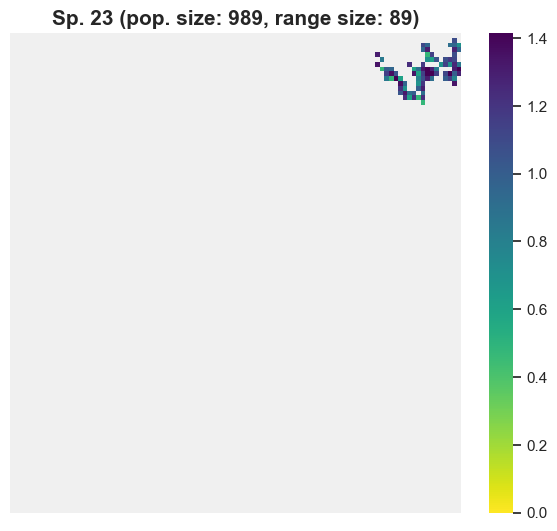

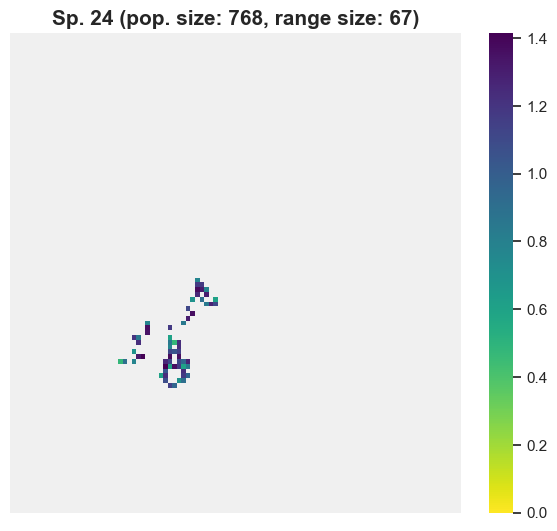

In [5]:
cn.plot_env_state(env, wd='.')

### Simulating the evolution of a system
We can simulate the evolution of a system for an arbitrary number of time steps. At each step there will be some level of natural mortality of individuals with replacement and dispersal events determined by the dispersal rate. The system will be also affected by changes in climate and anthropogenic disturbance based on the models specified when setting up the environment (see above).
We can let the system evolve for a number of steps, e.g. `n_steps = 15` in a simple for loop:

In [6]:
n_steps = 15
for i in range(n_steps):
    res = env.step()

Step: 1 N. protected cells: 0 Mean disturbance: 0.01, 0.0 Budget: 200.0 N. species: 25 Protection cost: 0
Step: 2 N. protected cells: 0 Mean disturbance: 0.02, 0.03 Budget: 200.0 N. species: 25 Protection cost: 0
Step: 3 N. protected cells: 0 Mean disturbance: 0.02, 0.06 Budget: 200.0 N. species: 25 Protection cost: 0
Step: 4 N. protected cells: 0 Mean disturbance: 0.03, 0.07 Budget: 200.0 N. species: 25 Protection cost: 0
Step: 5 N. protected cells: 0 Mean disturbance: 0.04, 0.1 Budget: 200.0 N. species: 25 Protection cost: 0
Step: 6 N. protected cells: 0 Mean disturbance: 0.04, 0.13 Budget: 200.0 N. species: 25 Protection cost: 0
Step: 7 N. protected cells: 0 Mean disturbance: 0.05, 0.15 Budget: 200.0 N. species: 25 Protection cost: 0
Step: 8 N. protected cells: 0 Mean disturbance: 0.06, 0.16 Budget: 200.0 N. species: 25 Protection cost: 0
Step: 9 N. protected cells: 0 Mean disturbance: 0.07, 0.18 Budget: 200.0 N. species: 25 Protection cost: 0
Step: 10 N. protected cells: 0 Mean dis

where `res` contains various summary information about the state of the system. Note that, as we did not specify a conservation policy,

We can now visualize how the system has changed after these steps by plotting it using the `plot_env_state()` function shown before. The plots are saved in a single PDF file with a file name that includes the current step number, so that the environment can be plotted at different steps to capture the evolution of the system.

Plot saved as: ./sim_step_15.pdf


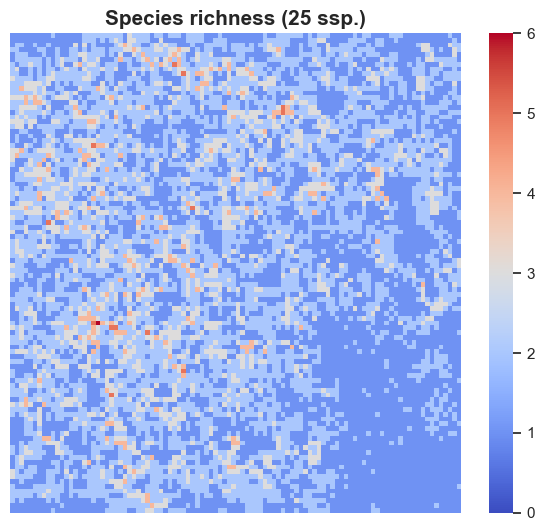

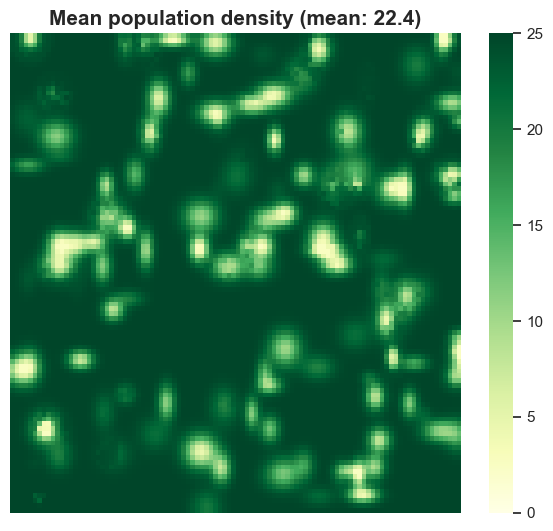

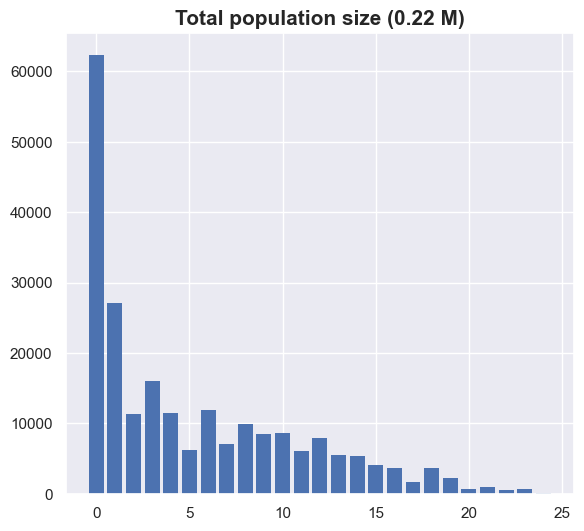

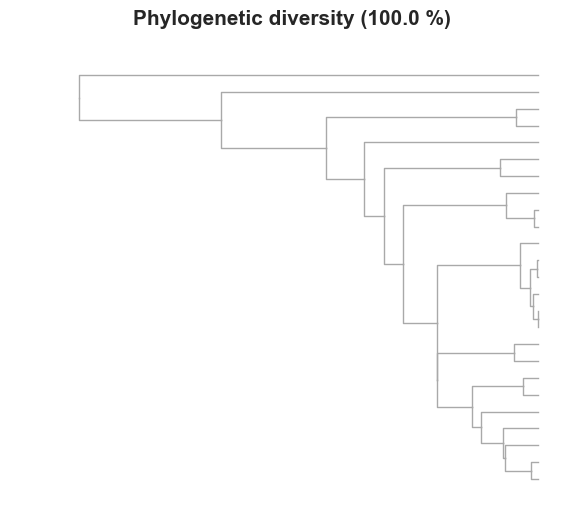

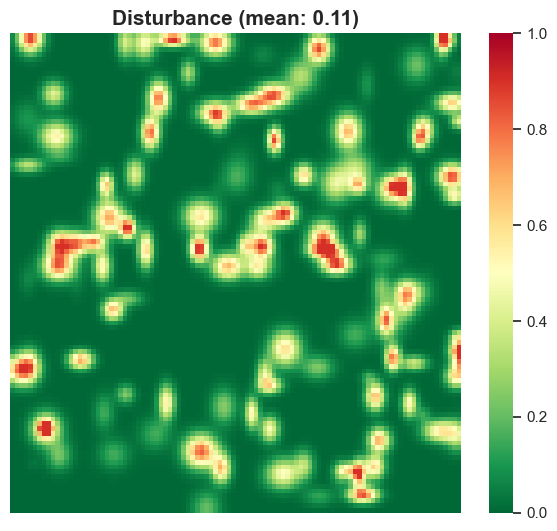

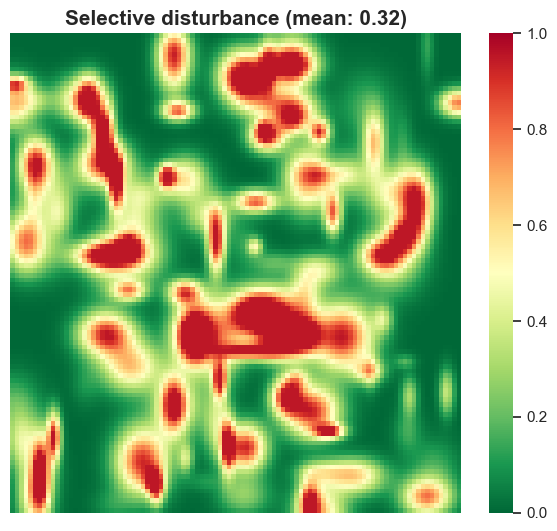

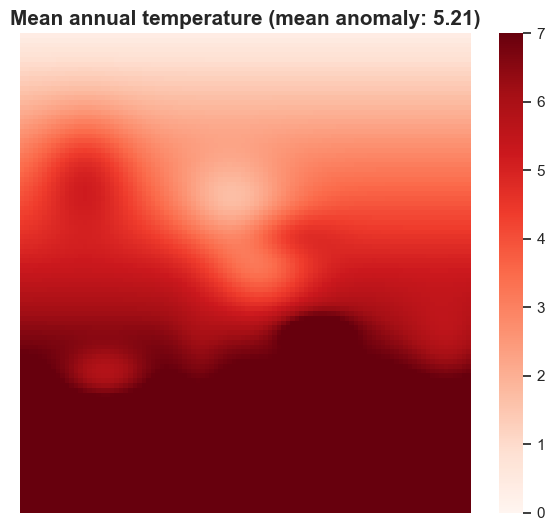

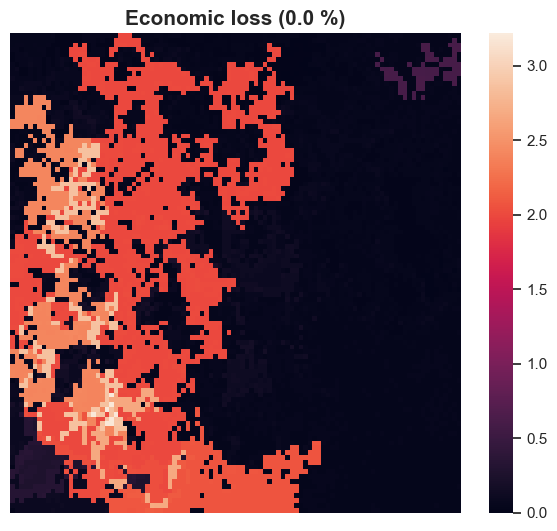

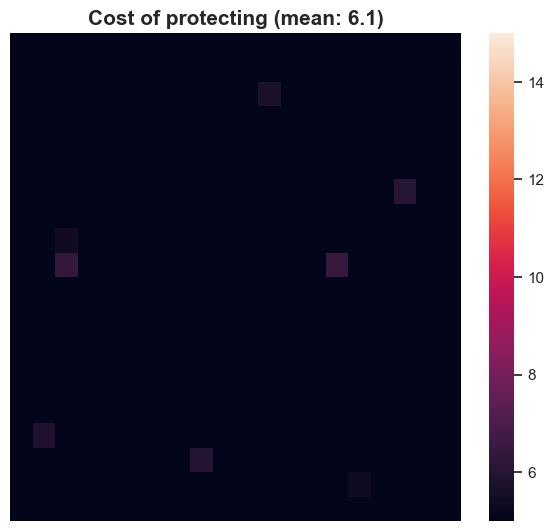

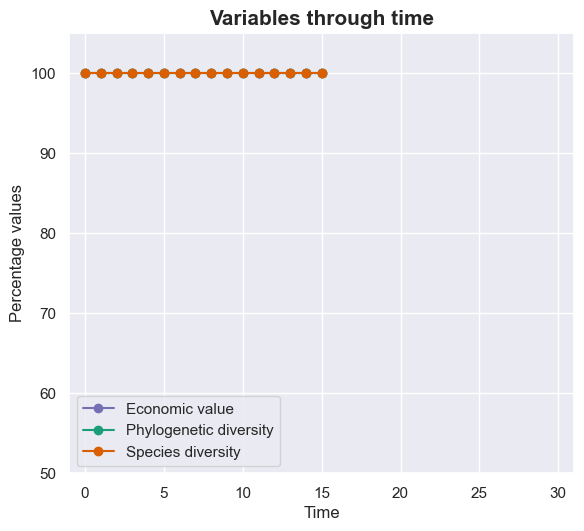

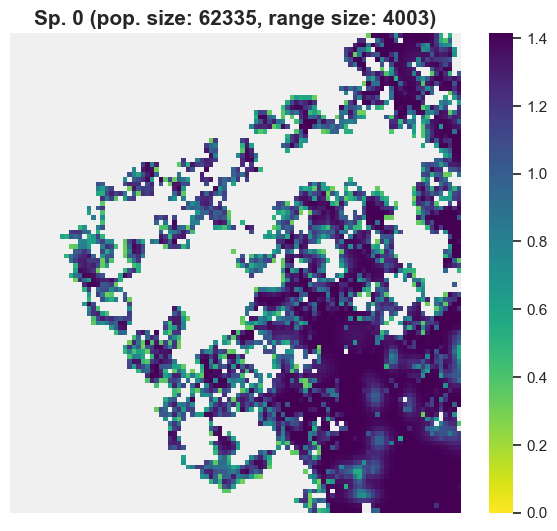

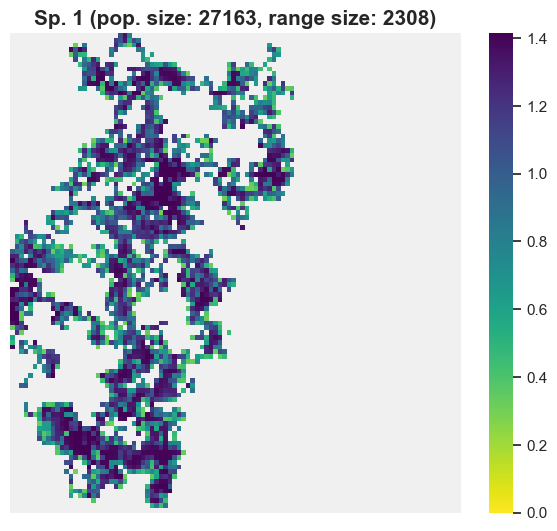

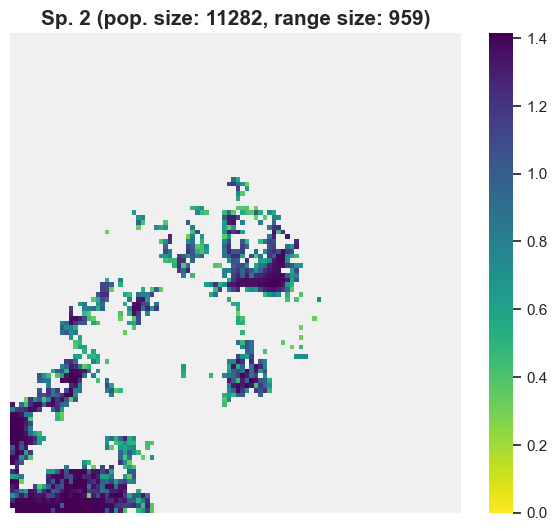

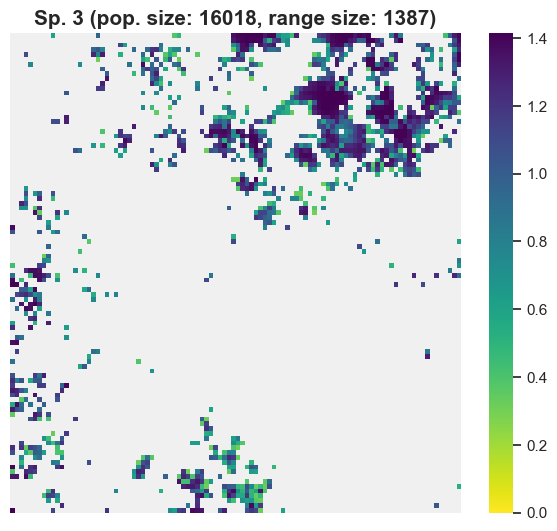

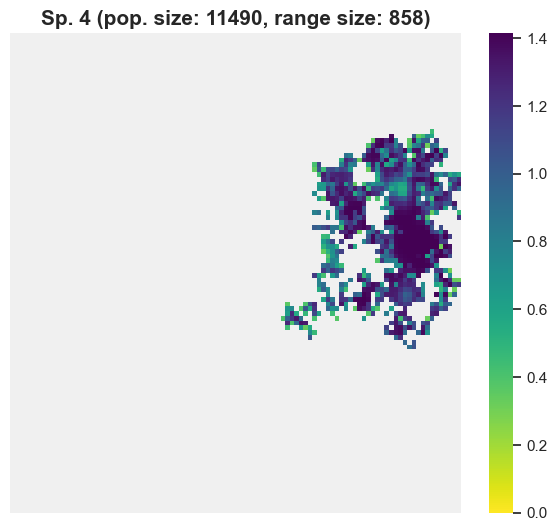

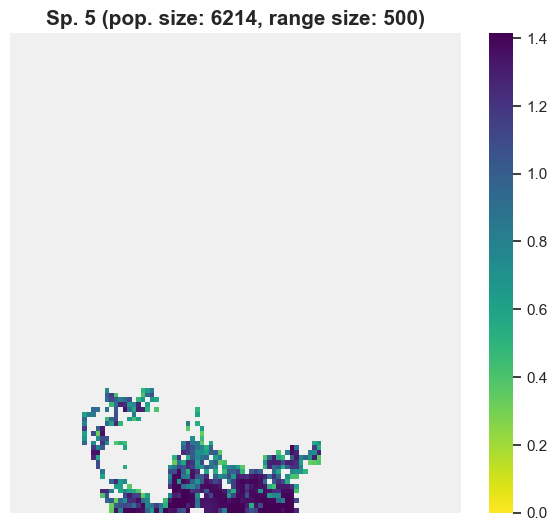

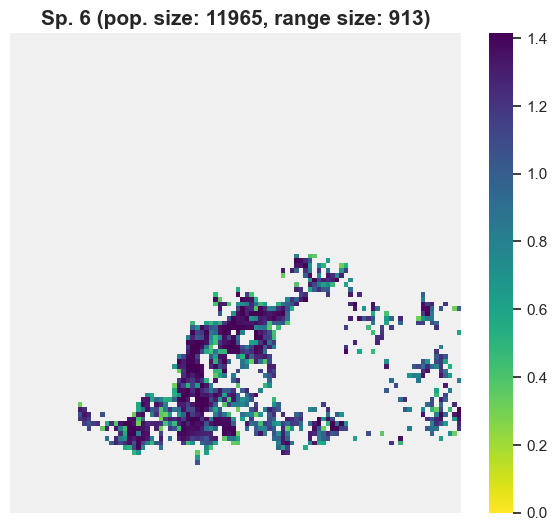

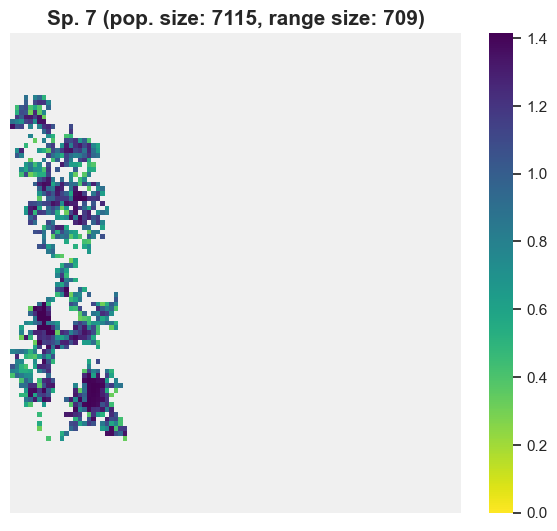

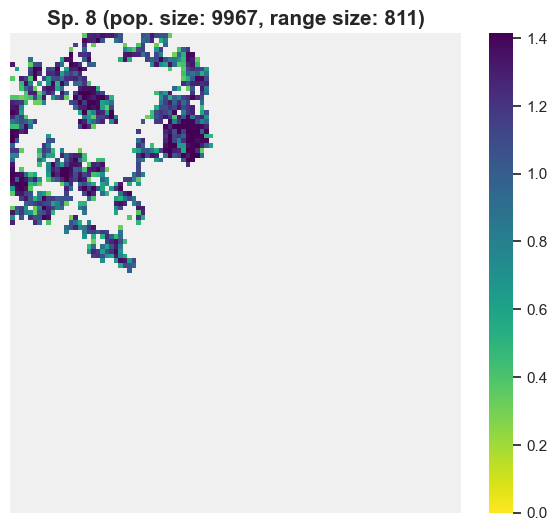

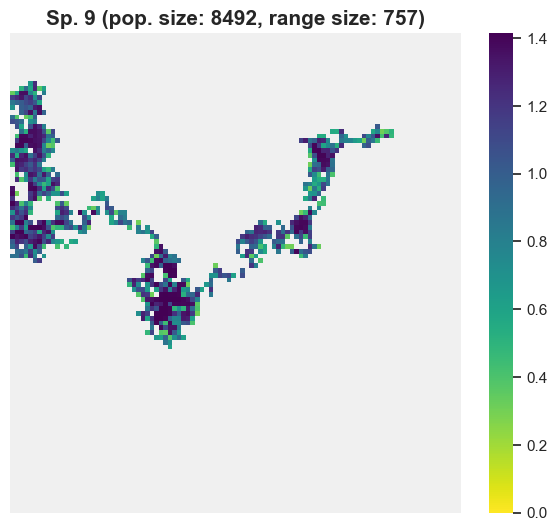

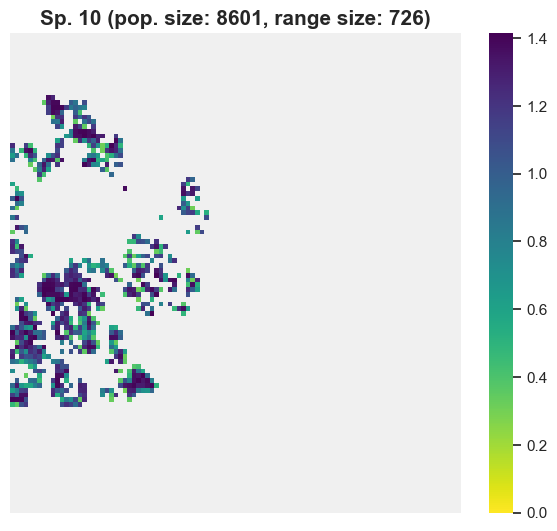

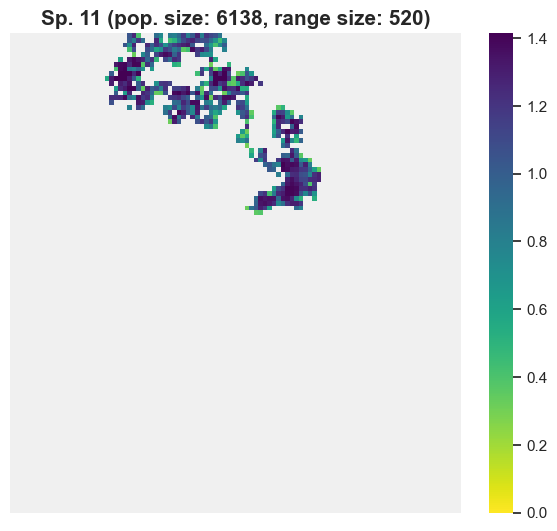

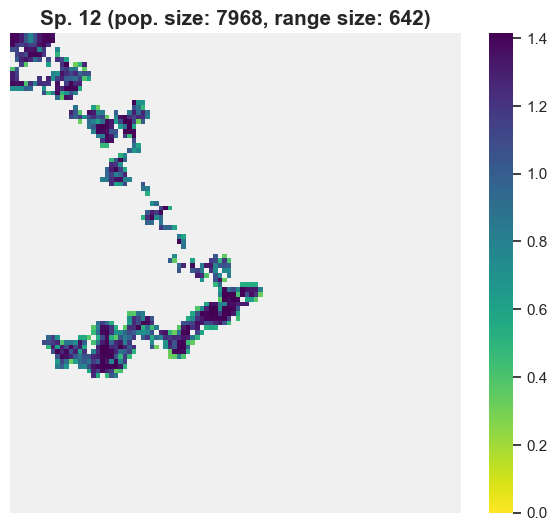

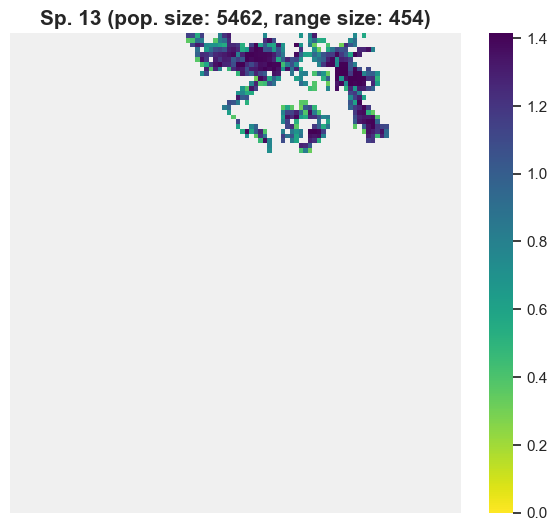

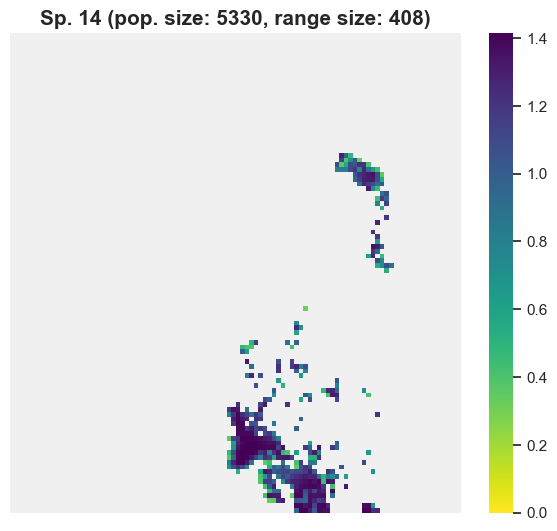

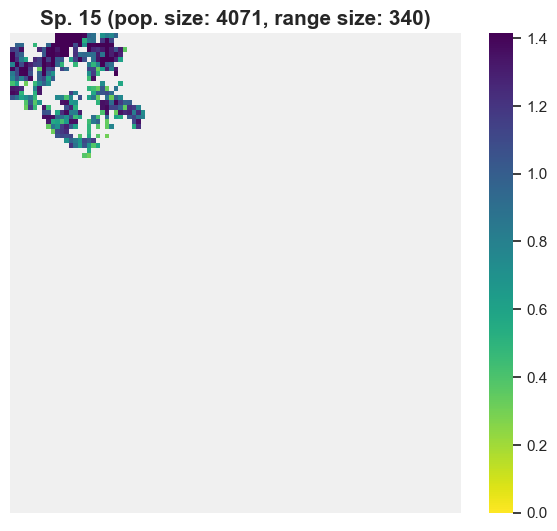

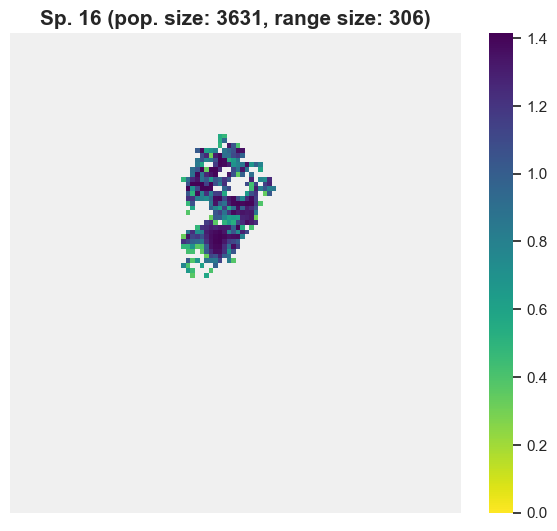

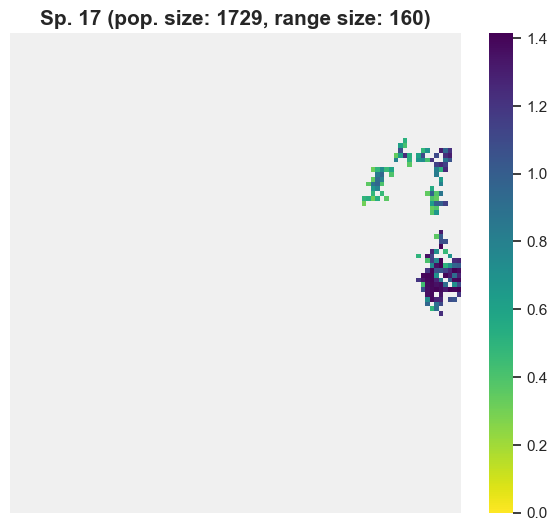

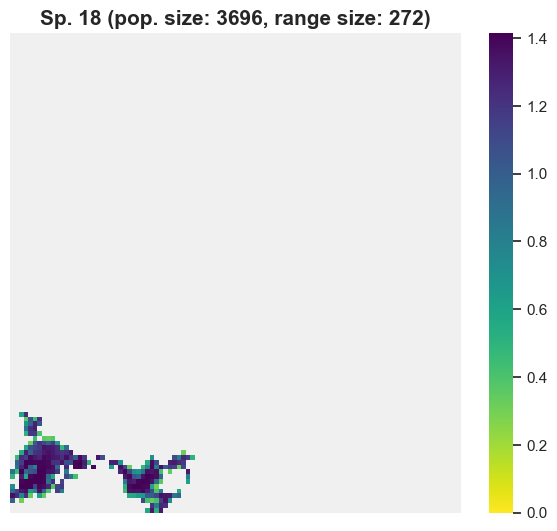

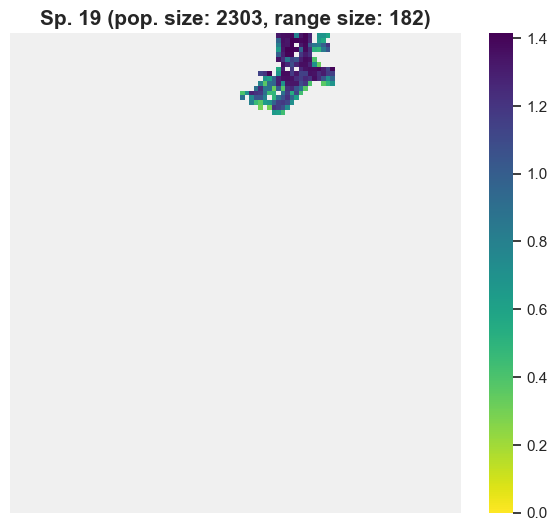

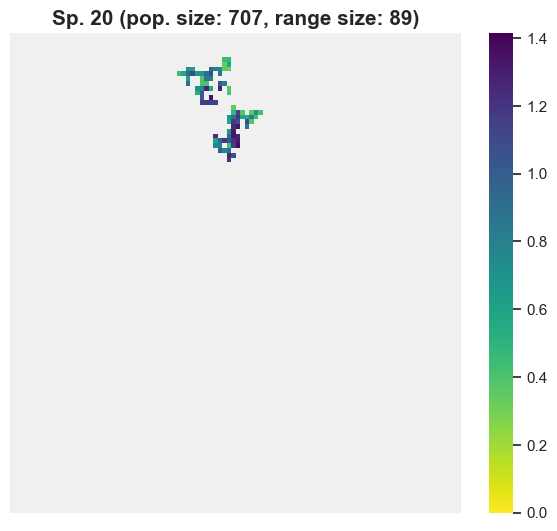

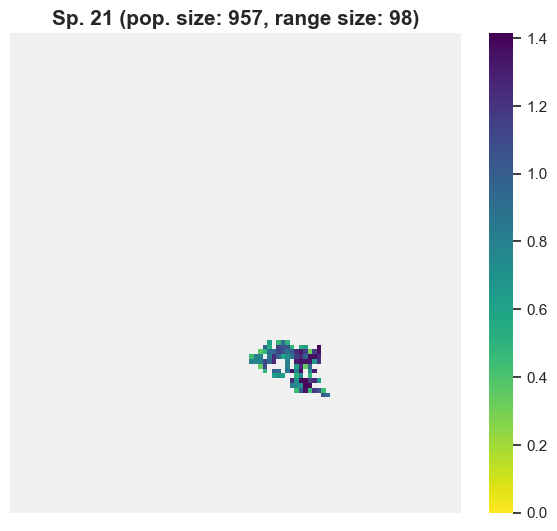

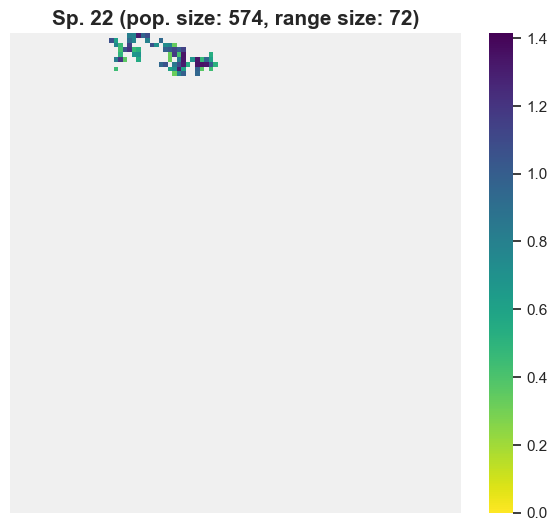

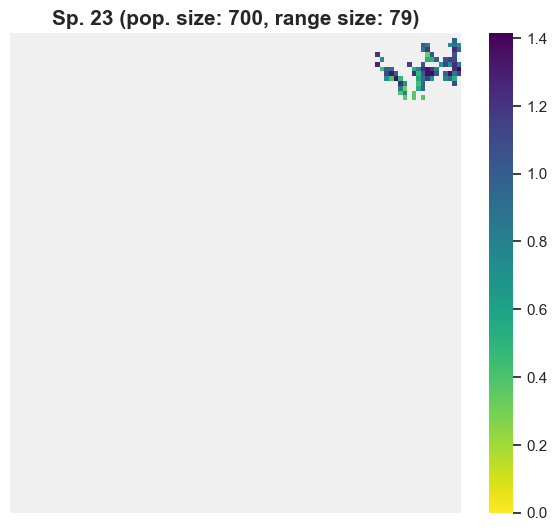

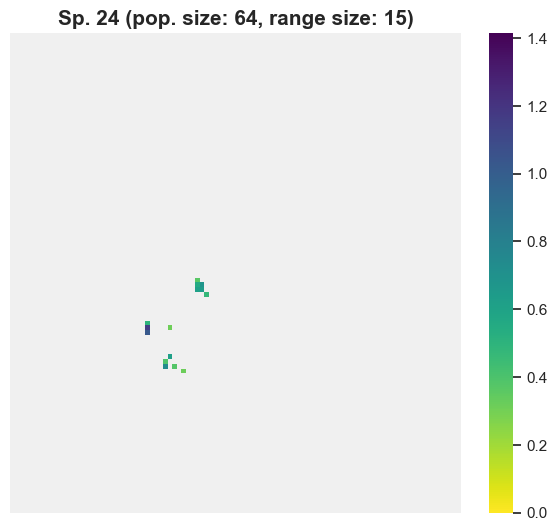

In [7]:
cn.plot_env_state(env, wd='.')

## Initializing simulated datasets for model training and predictions

Because the initialization of natural systems can be time-consuming and since multiple systems are typically used for model optimization and predictions, it is useful to generate and store a number of them so that they can be used in different analyses.  
This can be done in a simple for loop (these settings are the ones use to generate these datasets are available for [download](https://zenodo.org/api/files/c4663248-5dc2-4932-9d43-ec0c490595ae/data_dependencies.zip?versionId=d29260c1-7449-4075-aa83-6e32e5f0db7e)):

In [ ]:
n_datasets = 100
path_to_sim_data = 'data_dependencies'

for i in range(n_datasets):
    _ = cn.init_simulated_system(n_species=500,
                                 grid_size=50,
                                 cell_capacity=1000,
                                 out_dir = path_to_sim_data,
                                 seed=1000+i)

By specifying the random seed we ensure that 1) the simulations are replicable and 2) they are stored each in a different file, as the seed is part of the file name.

<BioDivEnv instance>
